In [1]:
import pandas as pd    # datamız okuma ve incelem için 
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
#from sklearn.preprocessing import StandardScaler  # verimizi standartize etmek için 

from sklearn.metrics import silhouette_score
# verilen küme sayısına göre çıkan skor arasındaki maksimum  değişimi bize olması gereken küme sayısını verir
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data 
df=pd.read_csv('Spotify-2000.csv')
df=df.drop("Index", axis=1)

# Clustering Music Genres

<img src='https://149346090.v2.pressablecdn.com/wp-content/uploads/2024/01/RoW-Spotify-flattened-scaled.jpg'>

## bu veri setinde KElbow methodunu kolanarak verimizin optimum kumeye ayırarak analiz yapacağız 

In [3]:
df.shape

(1994, 14)

## Datamız hakkında temel bilgiler edinelim 

In [4]:
df.info()  # datamız hakkında info almamıza yarar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB


In [5]:
df.describe()  #  datamızıın  numerik karakterlerin istatsitiksel değerlerine bakmamıza yarar

Year  Beats Per Minute (BPM)       Energy  Danceability  \
count  1994.000000             1994.000000  1994.000000   1994.000000   
mean   1992.992979              120.215647    59.679539     53.238215   
std      16.116048               28.028096    22.154322     15.351507   
min    1956.000000               37.000000     3.000000     10.000000   
25%    1979.000000               99.000000    42.000000     43.000000   
50%    1993.000000              119.000000    61.000000     53.000000   
75%    2007.000000              136.000000    78.000000     64.000000   
max    2019.000000              206.000000   100.000000     96.000000   

       Loudness (dB)     Liveness      Valence  Acousticness  Speechiness  \
count    1994.000000  1994.000000  1994.000000   1994.000000  1994.000000   
mean       -9.008526    19.012036    49.408726     28.858074     4.994985   
std         3.647876    16.727378    24.858212     29.011986     4.401566   
min       -27.000000     2.000000     3.000000      0.000000     2.000000   
25%       -11.000000     9.000000    29.000000      3.000000     3.000000   
50%        -8.000000    12.000000    47.000000     18.000000     4.000000   
75%        -6.000000    23.000000    69.750000     50.000000     5.000000   
max        -2.000000    99.000000    99.000000     99.000000    55.000000   

       Popularity  
count  1994.00000  
mean     59.52658  
std      14.35160  
min      11.00000  
25%      49.25000  
50%      62.00000  
75%      71.00000  
max     100.00000

In [6]:
df.isnull().sum()  # boş değerler var mı bakmamaıza yarıyor 

Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [7]:
df.columns

Index(['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

# Visualzition

In [8]:
import seaborn as sns
import plotly.express as px

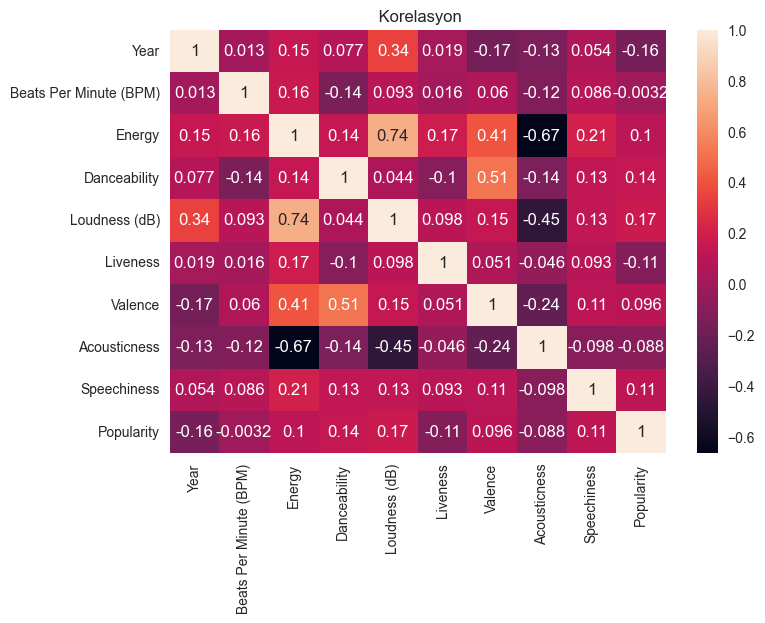

In [9]:
cor=df.corr(numeric_only=True)
sns.heatmap(cor,annot=True);
plt.title(' Korelasyon');

In [10]:
df.columns

Index(['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [11]:
sayi = df['Year'].value_counts() #bögle türe göre sayisi 

# Plotly ile Bölge  dağılımını görselleştirme
fig=px.bar(x=sayi.index,  
           y=sayi.values, # adetler değeri
           color=sayi.index, # rekleri yine sayisina göre
           labels={'x': 'yıl','y': 'Toplam Sayı'}, #label yazdırma
           title='yıl   Dağılımı', #başlık 
           template='plotly_dark') # arkapılan 

fig.show()

Text(0.5, 1.0, 'Yıllara göre en Fazla Şarkı Dağılımı')

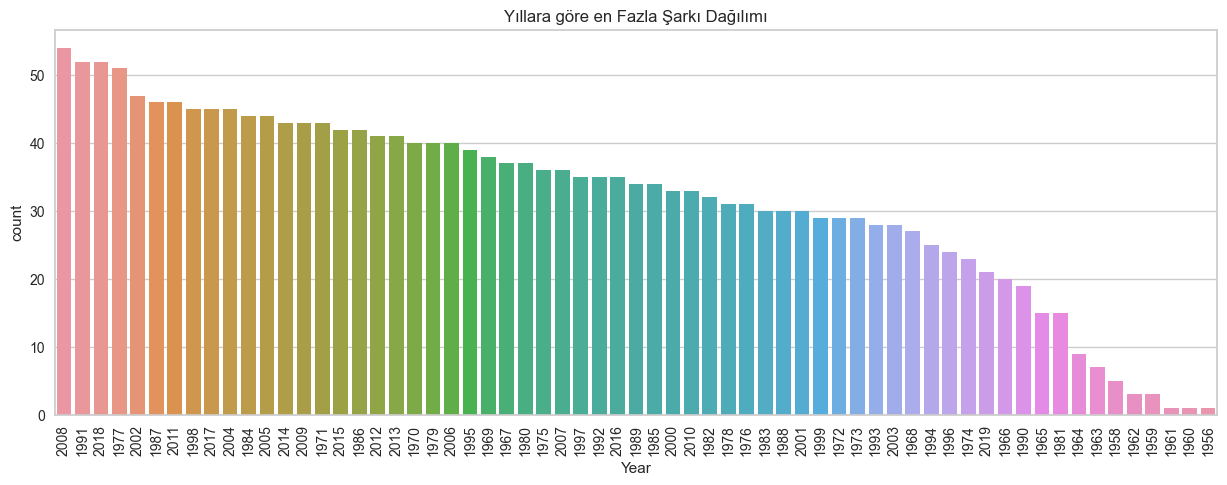

In [12]:
plt.figure(figsize=(15,5))
a=df['Year'].value_counts()
sns.countplot(x=df['Year'],order=a.index)
plt.xticks(rotation=90);
plt.title('Yıllara göre en Fazla Şarkı Dağılımı')

In [13]:
df.columns

Index(['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [14]:
count = df.groupby(['Top Genre']).size().reset_index(name='count')


fig = px.sunburst(count,
                  path=['Top Genre'],
                  values='count',
                  title='Müzik türüne göre pasta grafiği',
                  template='plotly_dark')
fig.show()

# Modeling

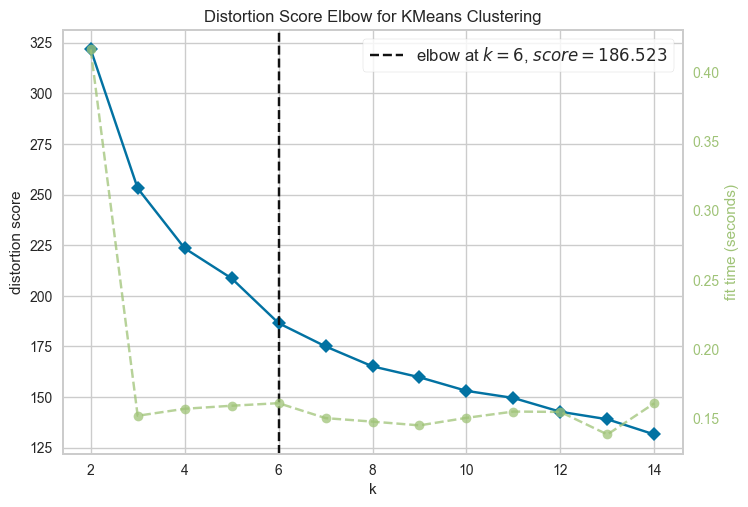

In [15]:
x=df[["Beats Per Minute (BPM)", "Loudness (dB)", 
              "Liveness", "Valence", "Acousticness","Speechiness"]]

from sklearn.preprocessing import MinMaxScaler
x= MinMaxScaler().fit_transform(x)

km=KMeans(random_state=42)
elbov=KElbowVisualizer(km,k=(2,15))
elbov.fit(x);
elbov.show();

###  sonuç olarak elbow methoduna göre küme sayimiz 5 olması gerekiyormuş

# Hierachical Clustering - hiyerarşik kümeleme ile gösterelim

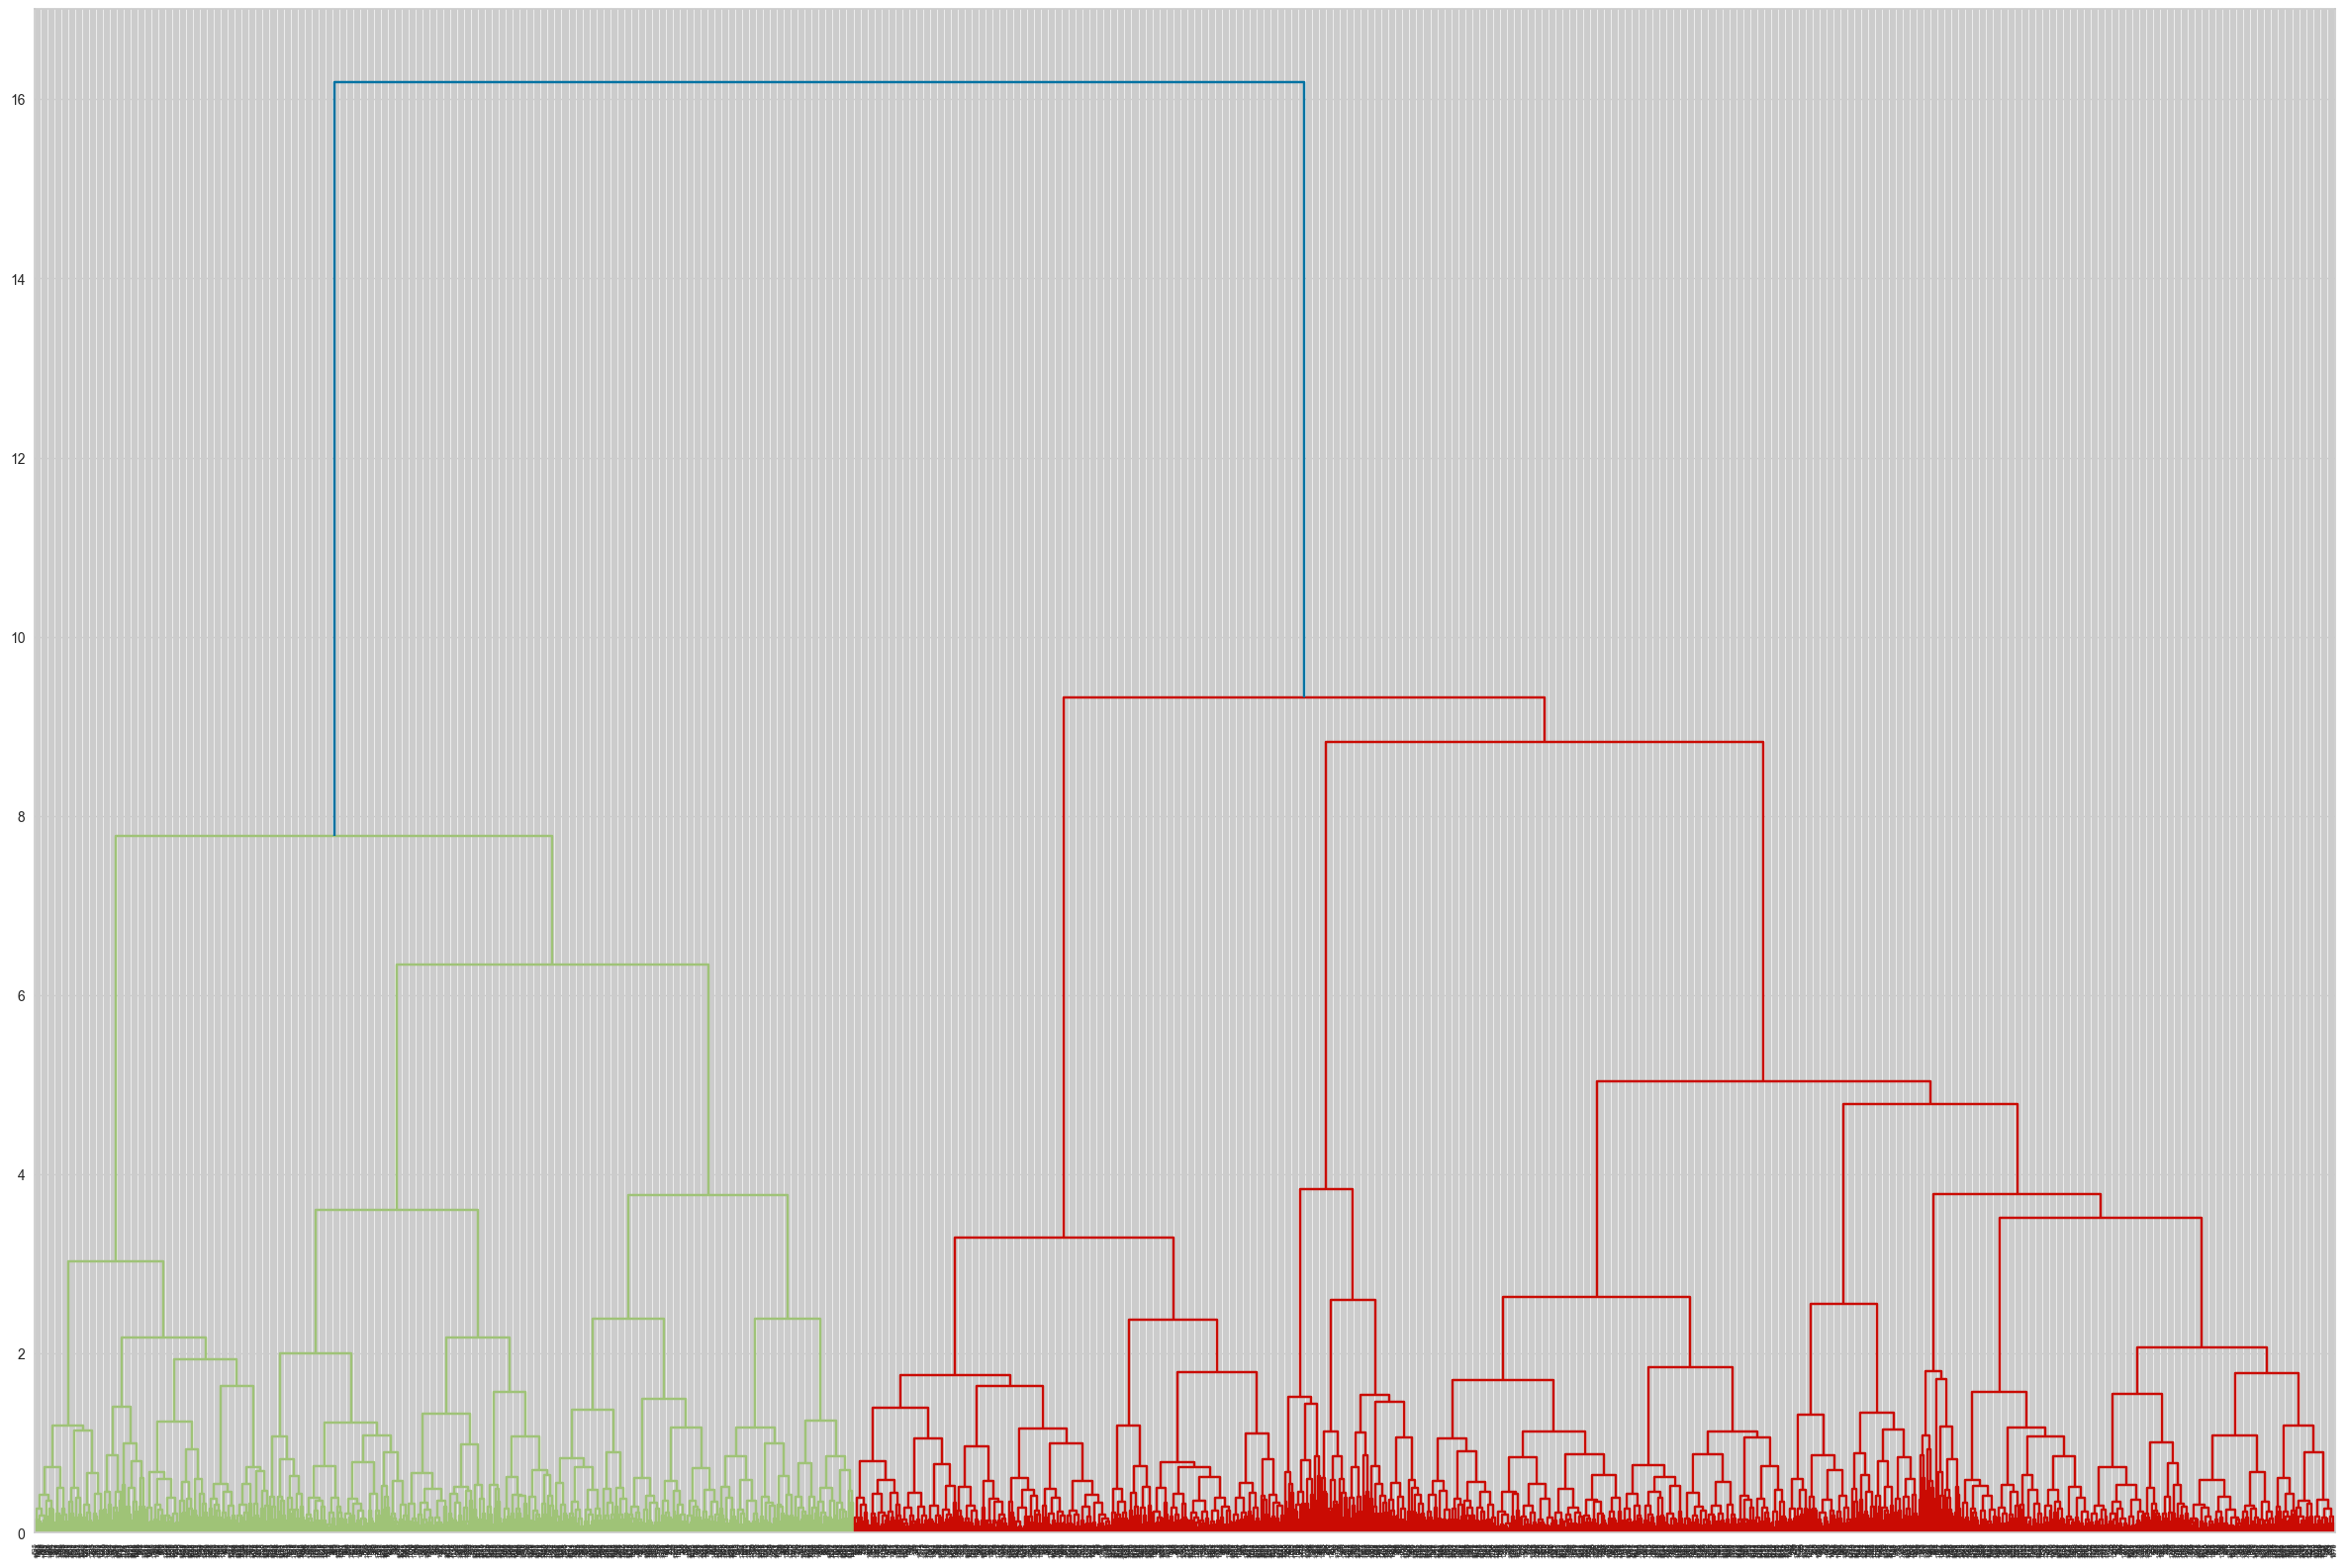

In [16]:
from scipy.cluster.hierarchy import dendrogram,linkage

data=linkage(x,method='ward',metric='euclidean')

plt.figure(figsize=(30,20))
dendrogram(data);

# Modeling

In [17]:
model = KMeans(n_clusters=6,random_state=42)

kume = model.fit_predict(x)
tahmin=model.predict(x)
tahmin

array([5, 0, 2, ..., 5, 5, 5])

In [18]:
df['kume']=tahmin

In [19]:
df.head()

Title             Artist            Top Genre  Year  \
0                 Sunrise        Norah Jones      adult standards  2004   
1             Black Night        Deep Purple           album rock  2000   
2          Clint Eastwood           Gorillaz  alternative hip hop  2001   
3           The Pretender       Foo Fighters    alternative metal  2007   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

   Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
0                     157      30            53            -14        11   
1                     135      79            50            -11        17   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
4                     106      82            58             -5        10   

   Valence Length (Duration)  Acousticness  Speechiness  Popularity  kume  
0       68               201            94            3          71     5  
1       81               207            17            7          39     0  
2       52               341             2           17          69     2  
3       37               269             0            4          76     2  
4       87               256             1            3          59     0

In [20]:
# Kümeye göre dağılım .

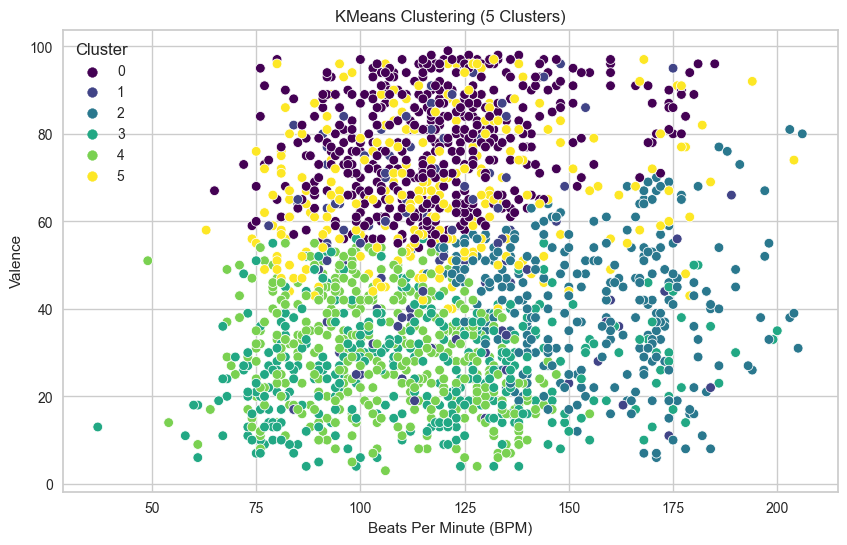

In [21]:
c

#  3d gösterim

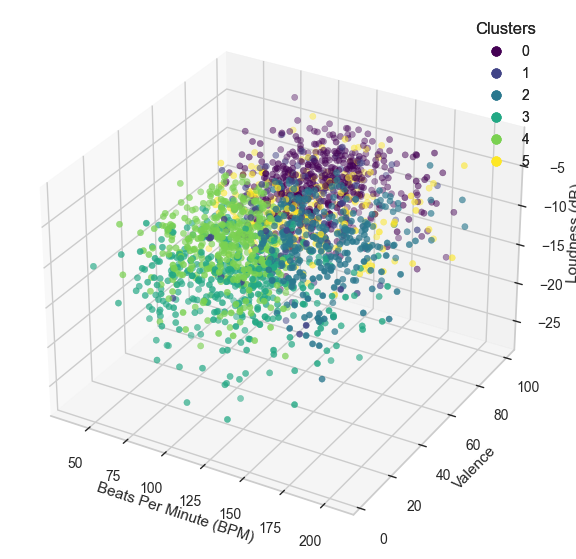

In [22]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Beats Per Minute (BPM)'], df['Valence'], df['Loudness (dB)'], c=df.kume, cmap='viridis')
ax.set_xlabel('Beats Per Minute (BPM)')
ax.set_ylabel('Valence')
ax.set_zlabel('Loudness (dB)')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

Text(0.5, 1.0, 'bar plot gösterimi')

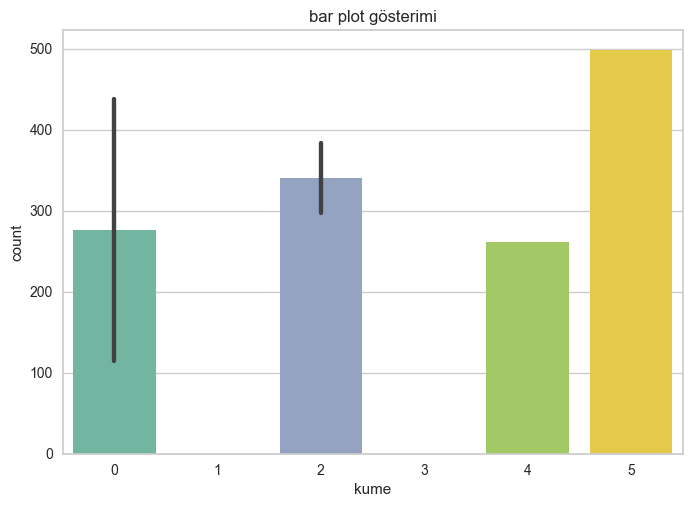

In [23]:
vc=df['kume'].value_counts()
sns.barplot(x='kume', y=vc , data=df, palette="Set2")
plt.title('bar plot gösterimi')

In [24]:
df.kume.unique()

array([5, 0, 2, 4, 3, 1])